# A생선이 도미인지 아닌지 판별
혼공머신 01-3 마켓과 머신러닝(p44-64)

## 1) 각 도미의 특징을 길이와 무게로 표현하여 구분

In [5]:
# 도미의 특징
# bream_length: 생선의 길이/ bream_weight: 생선의 무게
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

## 2) 두 특성을 숫자 → 그래프로 표현 (산점도scatter plot으로 표현)

맷플롯립(matplotlib) : 파이썬에서 과학계산용 그래프를 그리는 대표적인 패키지

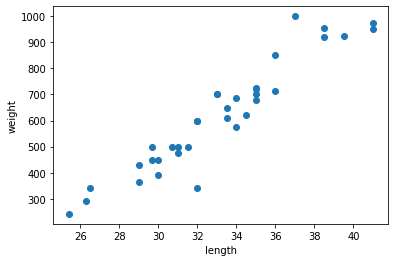

In [6]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

산점도의 그래프가 일직선에 가까운 형태로 나타나는 경우를 선형(linear)적이라고 함

In [9]:
# 빙어의 특징
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

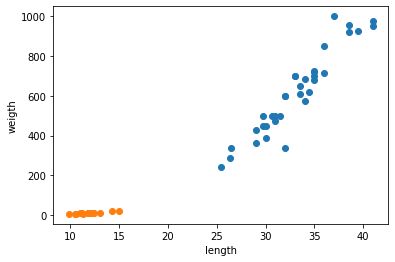

In [13]:
# 파이썬에서 한 번 import된 패키지는 그 파일 안에서는 다시 import 하지 않아도 됨
# 하지만, 코랩에서 구글 클라우드와 연결이 끊긴 후 다시 연결하면 패키지를 새로 import해야 됨
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

# k-최근접 이웃(k-Nearest Neighbors) 알고리즘

## 1. 데이터 준비

In [15]:
# 도미와 빙어 데이터를 하나의 데이터로 합침
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

사이킷런(scikit-learn)을 사용하기 위해 각 특성의 리스트를 세로 방향의 2차원 리스트로 변형

1) zip() : 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환

2) 리스트 내포 구문 사용

In [16]:
fish_data = [[l, w] for l, w in zip(length, weight)]

In [17]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


2. 정답 데이터 준비

앞서 도미와 방어를 순서대로 나열했기 때문에 

도미와 빙어를 숫자 1과 0으로 표현했을 때 

정답 리스트는 1이 35번, 0이 14번 등장

In [18]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


* 머신러닝에서는 2개를 구분하려는 경우, 찾으려는 대상을 1로 놓고 그 외에는 0으로 놓음

In [19]:
# scikit-learn 패키지에서 k-Nearest Neighbors 알고리즘을 구현한 클래스인 KNeighborsClassifier를 import
from sklearn.neighbors import KNeighborsClassifier

파이썬에서 패키지나 모듈 전체를 임포트하지 않고 특정 클래스를 import하려는 경우 from ~ import 구문 사용

import sklearn

model = sklearn.neighbors.KNeighborsClassifier()

In [20]:
# import한 KNeighborsClassifier 클래스의 객체를 먼저 생성
kn = KNeighborsClassifier()

## 2. 훈련(training)
: 모델에 데이터를 전달하여 규칙을 학습하는 과정

→ fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습

In [21]:
# fit() 메서드는 주어진 데이터로 알고리즘을 훈련시킨 뒤 훈련
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

## 3. 평가

In [22]:
# score() 메서드는 사이킷런에서 모델을 평가하는 메서드
# 0에서 1 사이의 값을 반환 (1은 모든 데이터를 정확하게 맞혔다는 것을 의미)
kn.score(fish_data, fish_target)

1.0

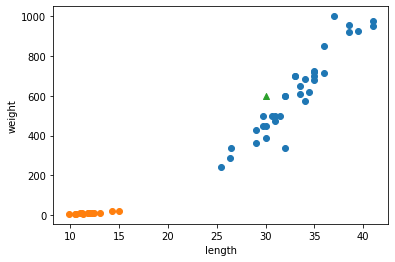

In [32]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
# predict() 메서드는 새로운 데이터의 정답을 예측
kn.predict([[30, 600]])

array([1])

**k-Nearest Neighbors 알고리즘**

- 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기만 하면 됨
- 단점 : 데이터가 아주 많은 경우 사용하기 어려움/ 데이터가 크기 때문에 메모리가 많이 필요, 직선거리를 계산하는 데도 많은 시간이 필요

In [26]:
# 사이킷런의 KNeighborsClassifier클래스는 _fit_X 속성에 fish_data를, _y 속성에 fish_target을 가짐
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [25]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


KNeighborsClassifier 알고리즘은 fit() 메서드에 전달한 데이터를 모두 저장하고 있다가

새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 도미인지 빙어인지 구분

In [27]:
# 참고하는 가까운 데이터는 기본 5개, 수정 가능
kn49 = KNeighborsClassifier(n_neighbors=49) #참고 데이터를 49개로 한 kn49 모델

In [28]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [29]:
print(35/49)

0.7142857142857143
